In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


#**BOW with basic features**

In [5]:
new_df = df.sample(50000, random_state = 42)

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [7]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
new_df.duplicated().sum()

0

is_duplicate
0    31547
1    18453
Name: count, dtype: int64
is_duplicate
0    63.094
1    36.906
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

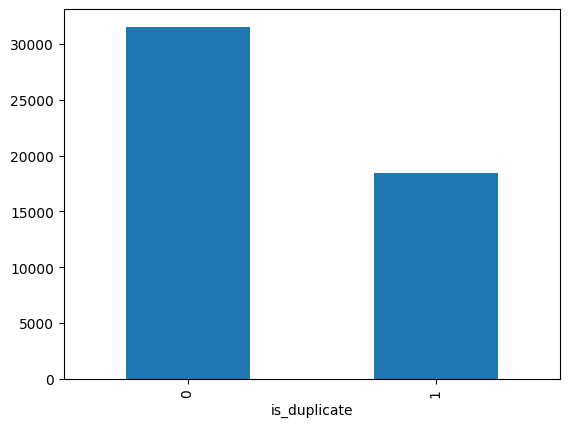

In [9]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind = 'bar')

In [10]:
qid = pd.Series(new_df['qid1'].to_list() + new_df['qid2'].to_list())
print('Number of unique questions: ', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated: ', x[x].shape[0])

Number of unique questions:  89109
Number of questions getting repeated:  7329


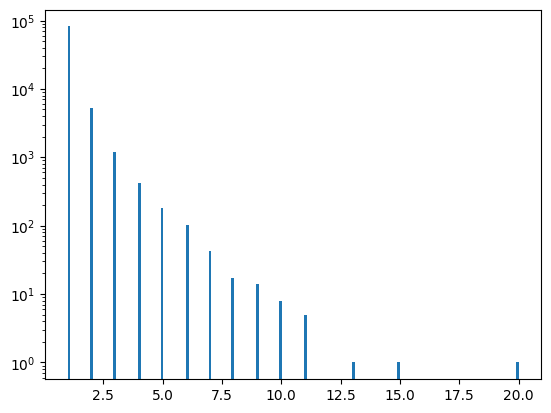

In [11]:
plt.hist(qid.value_counts(), bins = 160)
plt.yscale('log')
plt.show()

In [12]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29


In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7


In [15]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [16]:
new_df['word_common'] = new_df.apply(common_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3


In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [18]:
new_df['word_total'] = new_df.apply(total_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16


In [19]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20,0.30
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24,0.08
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16,0.25
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16,0.19


minimum characters:  1
maximum characters:  430
average number of characters:  59


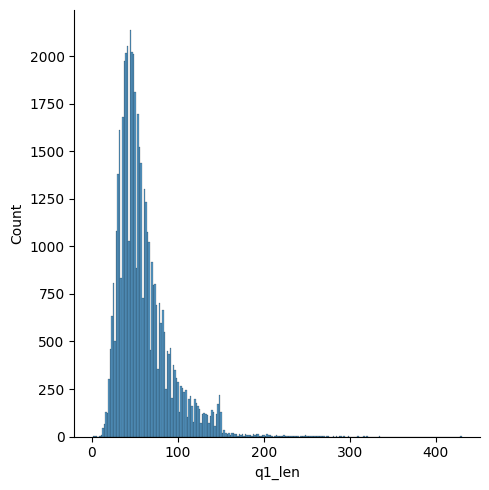

In [20]:
import warnings
warnings.filterwarnings('ignore')
#Analysis of Features
sns.displot(new_df['q1_len'])
print('minimum characters: ', new_df['q1_len'].min())
print('maximum characters: ', new_df['q1_len'].max())
print('average number of characters: ', int(new_df['q1_len'].mean()))

minimum characters:  1
maximum characters:  1169
average number of characters:  59


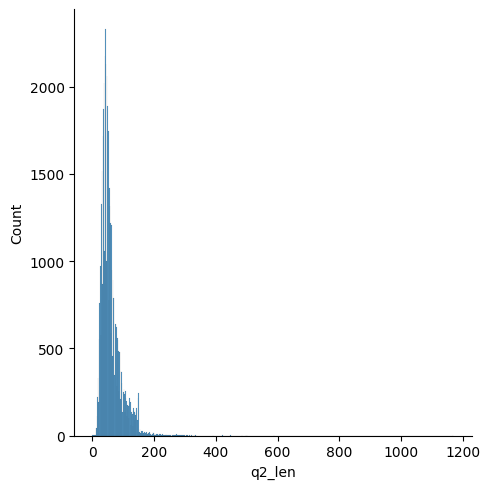

In [21]:
sns.displot(new_df['q2_len'])
print('minimum characters: ', new_df['q2_len'].min())
print('maximum characters: ', new_df['q2_len'].max())
print('average number of characters: ', int(new_df['q2_len'].mean()))

minimum words:  1
maximum words:  81
average number of words:  10


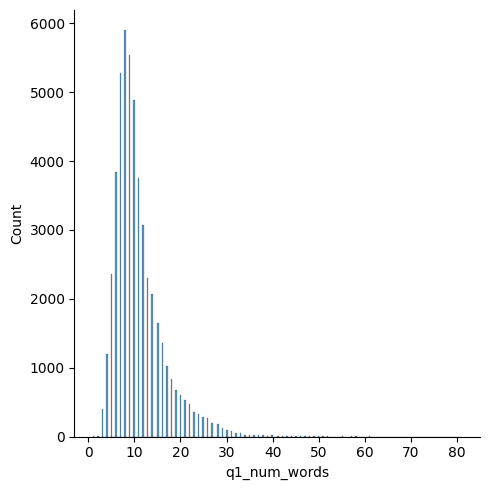

In [22]:
sns.displot(new_df['q1_num_words'])
print('minimum words: ', new_df['q1_num_words'].min())
print('maximum words: ', new_df['q1_num_words'].max())
print('average number of words: ', int(new_df['q1_num_words'].mean()))

minimum characters 1
maximum characters 1169
average number of characters 59


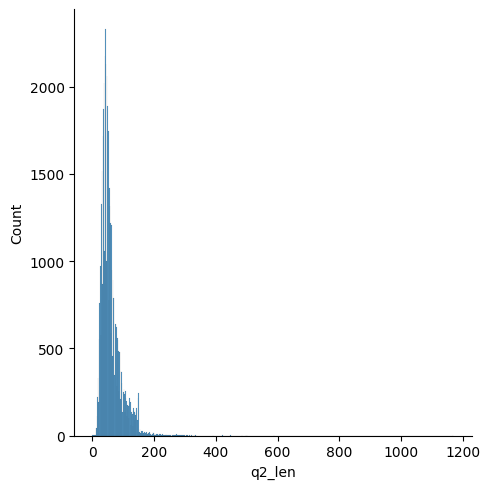

In [23]:
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average number of characters', int(new_df['q2_len'].mean()))

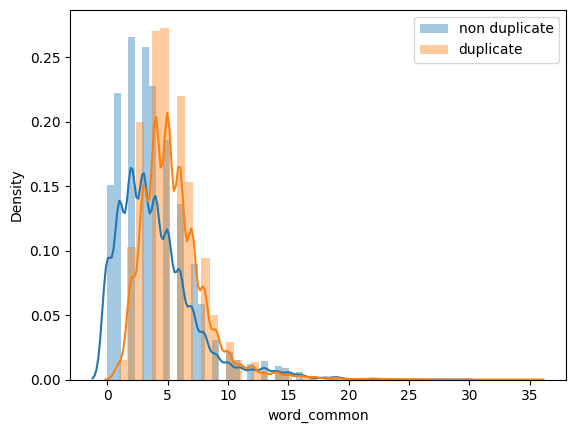

In [24]:
#common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

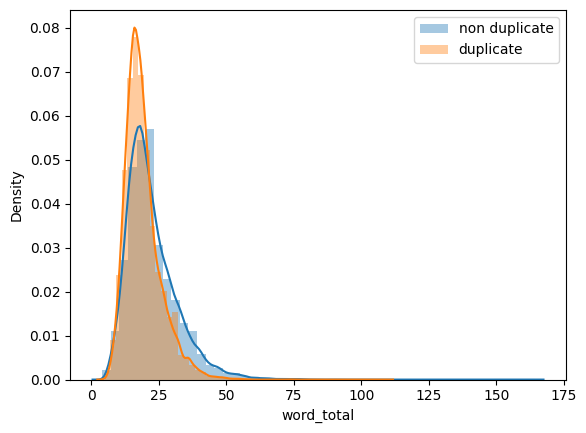

In [25]:
#total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'], label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'], label = 'duplicate')
plt.legend()
plt.show()

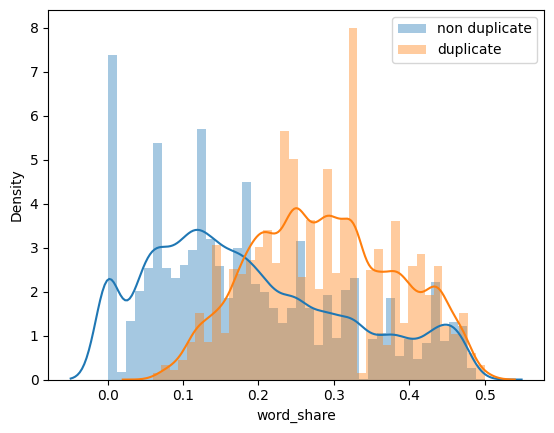

In [26]:
#word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'], label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label = 'duplicate')
plt.legend()
plt.show()

In [27]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [28]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,0,34,34,8,8,7,16,0.44
368101,0,53,51,11,9,6,20,0.30
70497,0,96,45,16,8,2,24,0.08
226567,1,44,52,7,9,4,16,0.25
73186,1,38,29,9,7,3,16,0.19


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [30]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(50000, 6000)

In [31]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,53,51,11,9,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,96,45,16,8,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,44,52,7,9,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,38,29,9,7,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7837

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.777

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred = et.predict(X_test)
accuracy_score(y_test,y_pred)

0.7921